# 정상성을 확인하는 방법

KPSS(Kwiatkowski-Phillips-Schmidt-Shin Test) 검정
ADF (Augmented Dickey-Fuller) 검정

In [1]:
# Kpss 불러오기
from statsmodels.tsa.stattools import kpss

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# KPSS 검정 수행
kpss_outputs = kpss(time_series_data_test)

# 검정 결과 출력
print('KPSS test 결과 : ')
print('--'*15)
print('KPSS Statistic:', kpss_outputs[0])
print('p-value:', kpss_outputs[1])

KPSS test 결과 : 
------------------------------
KPSS Statistic: 0.5941176470588235
p-value: 0.023171122994652404


In [3]:
# adfuller 불러오기
from statsmodels.tsa.stattools import adfuller

# 시계열 테스트 데이터
time_series_data_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# ADF 검정 수행
adf_outputs = adfuller(time_series_data_test)

# 검정 결과 출력
print('ADF Test 결과 : ')
print('--'*15)
print('ADF Statistic:', adf_outputs[0])
print('p-value:', adf_outputs[1])

ADF Test 결과 : 
------------------------------
ADF Statistic: 0.0
p-value: 0.958532086060056


/opt/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:926: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


# 정상성을 부여하는 방법
분산을 일정하게 만드는 방법
로그 변환(log transformation)

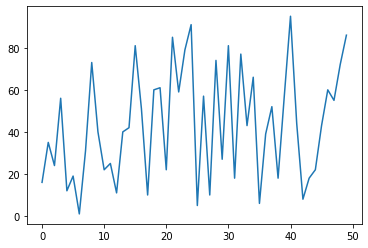

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 시계열 데이터 정의
time_series_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#아래의 주석을 없애고 다시 실행해보세요.
time_series_data = [random.randint(1, 100) for _ in range(50)]

# 시계열 데이터 로그변환
#time_series_data_log = np.log(time_series_data)

plt.plot(time_series_data)
plt.show()

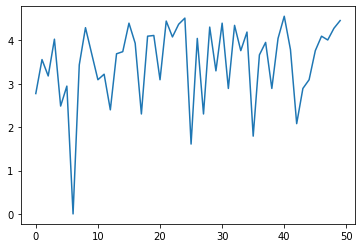

In [12]:
# 시계열 데이터 정의
#time_series_data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 아래의 주석을 없애고 다시 실행해보세요.
#time_series_data = [random.randint(1, 100) for _ in range(50)]

# 시계열 데이터 로그변환
time_series_data_log = np.log(time_series_data)
plt.plot(time_series_data_log)
plt.show()

# 평균을 일정하게 만드는 방법
회귀 (regression approach)
평활 (smoothing)
차분 (differencing)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

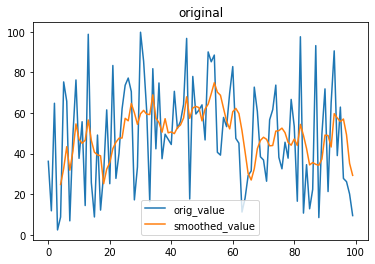

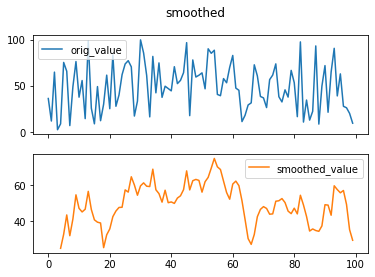

In [5]:
import random
import pandas as pd

# 랜덤한 수를 가지고 있는 Pandas 데이터프레임을 생성합니다.
df0 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})
df1 = pd.DataFrame({'orig_value': [random.uniform(0, 100) for _ in range(100)]})

df0['smoothed_value'] = df0['orig_value'].rolling(5).mean()

# 잡음이 포함된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, title='original')

# 잡음이 제거된 시계열 데이터를 시각화합니다.
df0.plot(legend=True, subplots=True, title='smoothed')

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

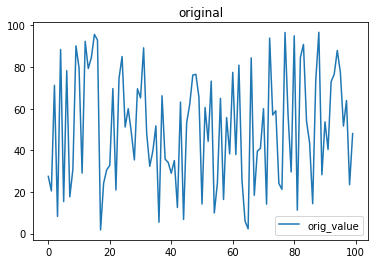

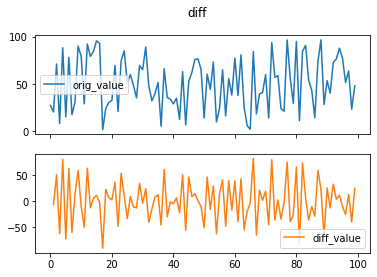

In [6]:
# 위에서 사용한 잡음이 있는 데이터를 그대로 활용하여 시각화합니다.
df1.plot(title='original')

# 차분을 적용하고 시각화합니다.
df1['diff_value'] = df1['orig_value'].diff()
df1.plot(legend=True, subplots=True, title='diff')

# ACF(AutoCorrelation Function) Plot

자기 상관 함수는 시간에 따른 상관 정도를 나타내기 위해 사용하는 통계량을 나타냅니다.
# PACF(Partial AutoCorrelation Function) Plot

편자기 상관 함수는 두 시점 사이의 상관관계를 보려고 하는 경우 시점의 영향을 주는 요소들을 제외한 상관관계를 볼때 사용합니다.

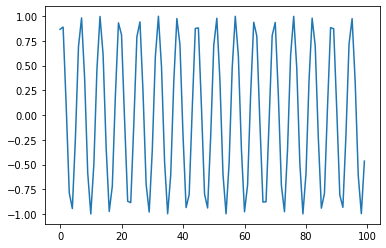

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # statsmodels은 통계 모델 추정, 통계 결과, 통계 데이터 탐색을 지원하는 python 모듈입니다.

x = np.array(range(100)) # 0~99까지 생성
y = np.sin(x + np.pi/3) # X에 0부터 99까지 할당하고, 이를 numpy.sin에 통과시키면 사인 함수 값이 도출됩니다.

plt.plot(y)
plt.show()

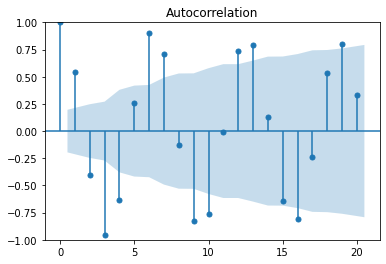

In [3]:
plot_acf(y)
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


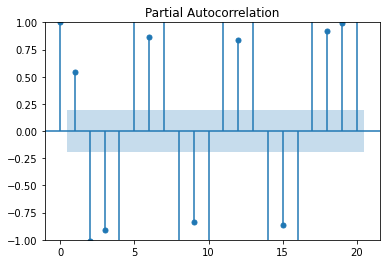

In [4]:
plot_pacf(y)
plt.show()

# Non-stationary 데이터의 ACF 및 PACF
1부터 100까지 선형적으로 증가하는 데이터의 ACF plot과 PACF plot입니다.

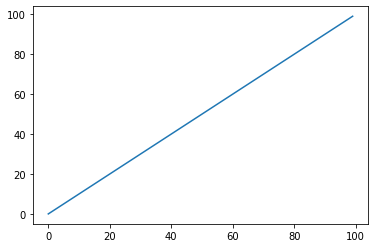

In [5]:
plt.plot(x) 
plt.show()

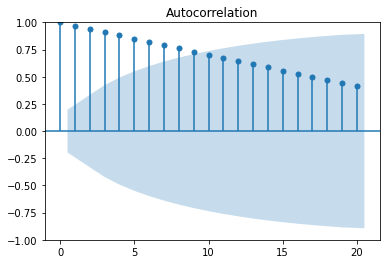

In [6]:
plot_acf(x) 
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


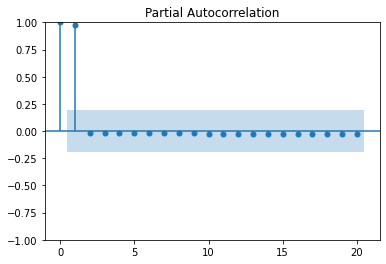

In [7]:
plot_pacf(x)
plt.show()